## Exploratory data analysis of the Irish weather

I performed Exploratory Data Analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.

In [1]:
# Loading the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? 


Used pandas.read_csv to load the weather.csv file

In [2]:
weather_data = pd.read_csv('./weather.csv')

Used head() to check if the load was successful and to see the first 5 records of the file

In [3]:
weather_data.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0


Used shape to check the dimensions. We can see the following observations from the data

1) There are 1095 records in the dataset and 10 columns (metrics) <br>
2) The data covers only 1 year - 2021 <br>
3) The temporal resolution is 1 day as the measurements have been taken for every day in 2021 across 3 different stations <br>
4) The following weather measurements have been reported -
  * maxtp: Maximum Air Temperature (C)
  * mintp: Minimum Air Temperature (C)
  * rain: Precipitation Amount (mm)
  * wdsp: Mean Wind Speed (knot)
  * hg: Highest Gust (knot)
  * sun: Sunshine duration (hours)

In [4]:
weather_data.shape

(1095, 10)

As described above, the number of years covered is 1 and the year covered is 2021

In [5]:
weather_data['year'].nunique()

1

In [6]:
weather_data['year'].unique()

array([2021], dtype=int64)

As described above, there are 365 records each for 3 different Airports and hence we can conclude that the weather measurements have been taken every day throughout 2021 (365 days). Hence the temporal resolution is 1 day. 

In [7]:
weather_data['station'].value_counts()

Dublin Airport     365
Shannon Airport    365
Cork Airport       365
Name: station, dtype: int64

As described above, the weather measurements reported are - maxtp, mintp, rain, wdsp, hg, sun

In [8]:
weather_data.columns

Index(['day', 'month', 'year', 'station', 'maxtp', 'mintp', 'rain', 'wdsp',
       'hg', 'sun'],
      dtype='object')

### 2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset.

    **Note:** You do not need to implement any of your suggested strategies.

Used info() to get information about the dataframe. We can see the following observations about missing values:

1) day, month, year, station columns do not have any missing values (1095 non null entries out of total 1095 entries) <br>
2) wdsp column has 1 missing value (1094 non null entries out of total 1095 entries) <br>
3) maxtp, mintp, sun columns have 2 missing values (1093 non null entries out of total 1095 entries) <br>
4) hg column has 3 missing values (1092 non null entries out of total 1095 entries) <br>
5) rain column has 4 missing values (1091 non null entries out of total 1095 entries) <br>

#### Reasons for missing values:
Even though the number of missing values is very low, there could be quite a few reasons behind their absence:

1) The equipment used to monitor the measurements might have malfunctioned leading to loss of measurements <br>
2) If the records are taken manually, it is possible that the person in charge of taking the measurements might have forgot to measure or record the measured observations <br>
3) The recorded values were 0 and they left it as null instead of actually updating it to 0 <br>

#### Strategies for filling missing values:

##### 1) Delete the Rows with Missing Values:
We can delete the rows/columns which contain the null values from our data. In our case, we can delete the rows with null records as all the columns have very few non-null records (<5)

**Pros:** <br>
This will play a major role when it comes to model creation as using a dataset without missing values can help create a better model <br>
In our data, since the number of records with missing values is very low (<5), there won't be any real impact on the dataset

**Cons:** <br>
Since the number of records with missing values is low, no major cons are observed

##### 2) Impute missing values with Mean/Median/Mode
For metrics with continuous numerical data, we can replace the missing values with Mean/Median/Mode of the column depending upon the data. This will help us avoid losing data like in strategy 1.

**Pros:** <br>
Helps avoid the loss of data when compared to strategy 1 <br>
Easy to implement when the dataset is relatively small (works well for our dataset) <br>

**Cons:** <br>
Works only for continuous numerical data (works for our data) <br>
Depends on the metric in order to decide which statistical method to choose (Median/Mean/Mode) <br>
   * For instance a high value of temperature may not make sense if the missing temp value is during winter <br>
   * So this will require some trail & error before we can finalize which method (mean/median/mode) to choose

##### 3) Impute missing values using Forward filling or Backward filling
If the number of records missing is very low, we can use either forward filling or backward filling to fill the data.
Forward filling means filling missing values with previous data (previous day in our case). Backward filling means filling missing values with next data point (next day in our case).

**Pros:** <br>
Helps to quickly fill up the missing values while making sure the data makes sense <br>
Easy to implement, and works especially well with time series data like our dataset

**Cons:** <br>
No real cons if the dataset is small (especially our case)

In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day      1095 non-null   int64  
 1   month    1095 non-null   object 
 2   year     1095 non-null   int64  
 3   station  1095 non-null   object 
 4   maxtp    1093 non-null   float64
 5   mintp    1093 non-null   float64
 6   rain     1091 non-null   float64
 7   wdsp     1094 non-null   float64
 8   hg       1092 non-null   float64
 9   sun      1093 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 85.7+ KB


### 3A. How many different weather stations are included in the data set? 
### 3B. At what station and on what date was the lowest minimum air temperature recorded? 
### 3C. At what station and on what date was the largest amount of rain recorded?

**Answer A**

3 different weather stations are included in the dataset. They are -

1) Dublin Airport <br>
2) Shannon Airport <br>
3) Cork Airport

In [10]:
weather_data['station'].nunique()

3

In [11]:
weather_data['station'].unique()

array(['Dublin Airport', 'Shannon Airport', 'Cork Airport'], dtype=object)

**Answer B**

The lowest minimum air temperature was recorded at Dublin airport on 9 January 2021

In [12]:
val = weather_data['mintp'].min()
weather_data[['day','month','year','station','mintp']].loc[weather_data['mintp'] == val]

,day,month,year,station,mintp
8,9,jan,2021,Dublin Airport,-5.9


**Answer C**

The largest amount of rain was recorded at Cork airport on 27 October 2021

In [13]:
val = weather_data['rain'].max()
weather_data[['day','month','year','station','rain']].loc[weather_data['rain'] == val]

,day,month,year,station,rain
1029,27,oct,2021,Cork Airport,50.1


### 4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements.

Used describe() to create a numerical summary of the weather measurements and skew() to look at their respective skewness. We can make the following observations about the data:

1) All the recordings were taken in 2021 <br>
2) The highest minimum temperature was 18.7 C while the lowest minimum temperature was -5.9 C with the mean temperature being 6.95 C and the median temperature being very close at 7.1 C <br>
3) The highest maximum temperature was 29.6 C while the lowest maximum temperature was 0.6 C with the mean temperature being 13.7 C and the median temperature being very close at 13.4 C<br>
4) The maximum rainfall was 50.1 mm which is way higher than the mean rainfall (2.6 mm) and the median rainfall (0.3 mm). For context, it is way higher than even the 99th percentile value of 21.4 mm suggesting an unusually wet day in 2021  <br>
5) The highest mean windspeed was 26.3 knots which is way higher than the mean windspeed (8.6 knots) and the median windspeed (7.9 knots). For context, it is higher than even the 99th percentile value of 20.1 knots suggesting an unusually windy day in 2021 <br>
6) Similarly, the maximum value of highest gust was 64 knots which is higher than the 99th percentile value of 48 knots suggesting an unusually gusty day in 2021 <br>
7) The average sunshine duration in 2021 was 4 hours with the highest duration being 15.2 hrs while the lowest being 0 hrs or no sunshine at all! <br>
8) All the measurements except minimum temperature are positvely skewed with rainfall having a high positive skew

In [14]:
weather_data.describe([0.25,0.5,0.75,0.9,0.99])

,day,year,maxtp,mintp,rain,wdsp,hg,sun
count,1095.000000,1095.0,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,15.720548,2021.0,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,8.800266,0.0,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,1.000000,2021.0,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,8.000000,2021.0,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,16.000000,2021.0,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,23.000000,2021.0,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
90%,28.000000,2021.0,20.100000,13.080000,8.500000,13.500000,34.000000,10.200000
99%,31.000000,2021.0,25.724000,15.908000,21.400000,20.128000,48.000000,14.500000
max,31.000000,2021.0,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


In [17]:
weather_data[['maxtp','mintp', 'rain', 'wdsp', 'hg', 'sun']].skew(axis = 0)

maxtp    0.106936
mintp   -0.142038
rain     3.327455
wdsp     1.132810
hg       0.993651
sun      0.863773
dtype: float64

### 5. Create a graphical summary for each of the weather measurements.

Used seaborn and matplotlib to plot the graphical summary of each of the weather measurements. Used skew to check the skewness of the metrics. Used histogram and boxplot to show the distibutions. We can observe the following from the display:

1) The maximum temperature ('maxtp') feature is slightly positively skewed with a few outliers lying outside (based on the boxplot) <br>
2) The minimum temperature ('mintp') feature is slightly negatively skewed without any outliers (based on the boxplot) <br>
3) The other features ('rain', 'wdsp', 'hg', 'sun') are all positively skewed with rain having a highly skewed data<br>
4) ~ 55% of the days (~600/1095) have a rain measurement of < 0.5. Hence the distribution is heavily positively skewed <br>
5) From the boxplot for 'rain', we can clearly see there's 1 day with a very high rainfall than the rest of the days in 2021 <br>
6) Similarly, based on the boxplot for highest gust ('hg'), we can clearly see that there are 2 days where the gust is higher than the rest of the days in 2021 <br>
7) More than 75% of the days have a sunlight duration ('sun') of under 7 hours <br>

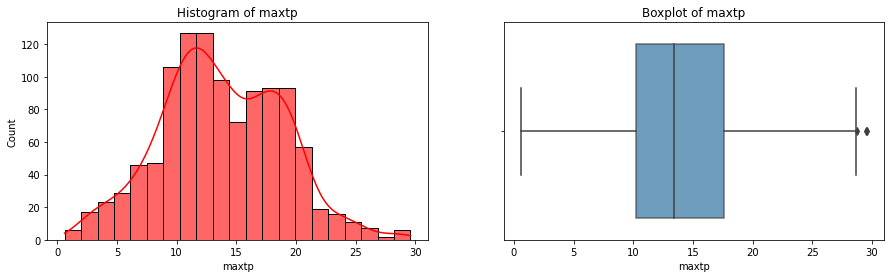

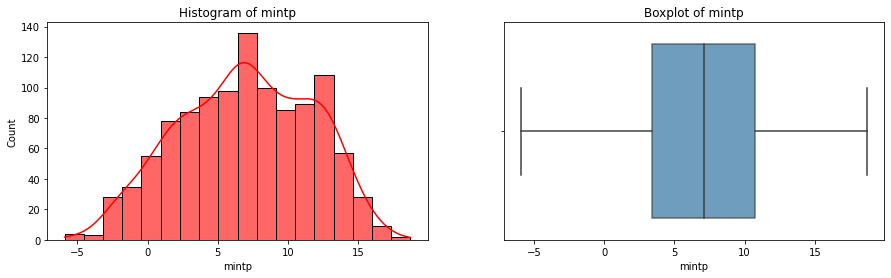

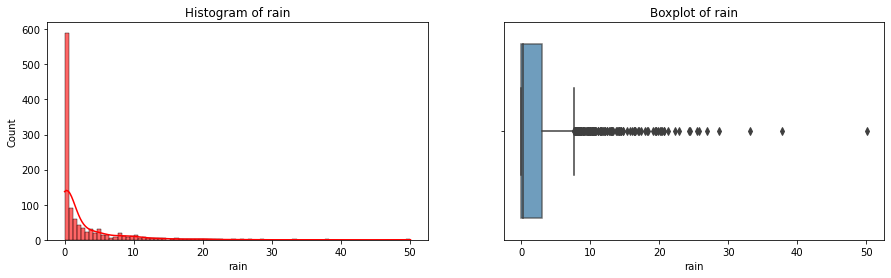

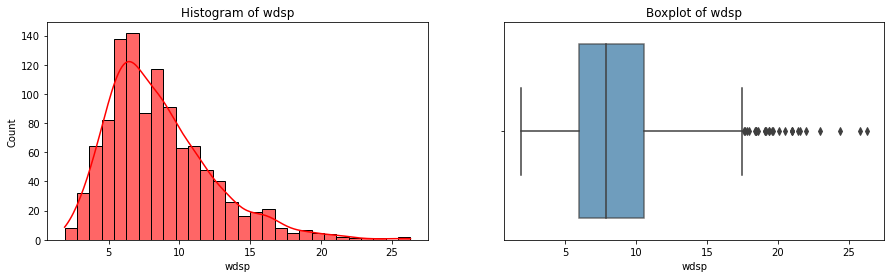

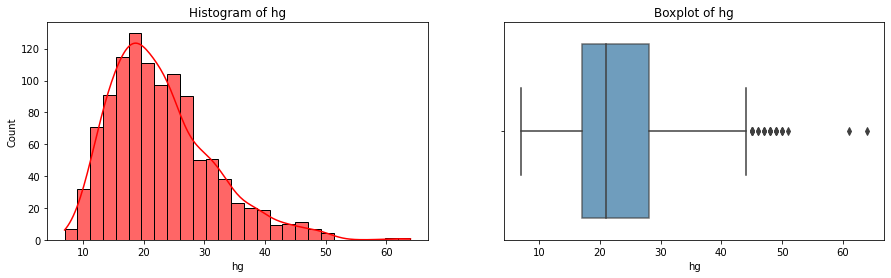

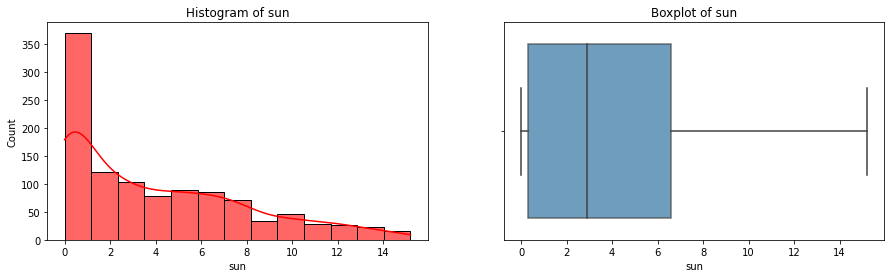

In [21]:
cols = ['maxtp', 'mintp', 'rain', 'wdsp', 'hg', 'sun']

for col in cols:
    fig, ax = plt.subplots(1, 2, figsize = (15,4))
    sns.histplot(data = weather_data, x = col, ax = ax[0], alpha = 0.6, color = 'r', kde = True)
    ax[0].set_title(f"Histogram of {col}")
    sns.boxplot(data = weather_data, x = col, ax = ax[1], boxprops=dict(alpha= 0.7))
    ax[1].set_title(f"Boxplot of {col}")

### 6. Produce a scatter plot of the maximum temperature versus the minimum temperature and colour your points based on month. 

Used seaborn's scatterplot function to plot the scatterplot between maximum temperature and minimum temperature. Used the hue feature to colour the points based on month.

Based on the plot, we can see the following trends -

1) December, January and February seem to be in the lowest bucket in terms of both maximum and minimum temperature <br>
2) March, April, May and October are in the middle bucket in terms of minimum temperature and maximum temperature <br>
3) June, July, August and September are in the highest bucket in terms of both maximum and minimum temperature <br>
4) July had the highest maximum temperature and highest minimum temperature while January had the lowest maximum temperature and lowest minimum temperature

Text(0, 0.5, 'Minimum Temperature (mintp) in C')

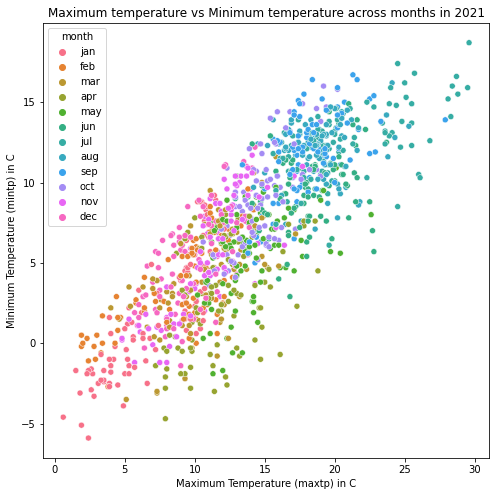

In [44]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
sns.scatterplot(data = weather_data, x = 'maxtp', y = 'mintp', hue = 'month')
plt.title('Maximum temperature vs Minimum temperature across months in 2021')
plt.xlabel('Maximum Temperature (maxtp) in C')
plt.ylabel('Minimum Temperature (mintp) in C')

### 7. Compute the daily temperature range, and add this as an additional variable to your DataFrame.

Computed the daily temperature range by finding the difference between the maximum temperature and the minimum temperature in a day and created a new variable called 'temp_range' to store the value. 

Used head() to show the first 5 rows of the resultant dataframe to check if 'temp_range' variable is present.

In [23]:
weather_data['temp_range'] = weather_data['maxtp'] - weather_data['mintp']
weather_data.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_range
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


### 8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station. 

Used seaborn's scatterplot function to plot the scatterplot between temperature range and sunlight. Used the hue feature to colour the points based on the weather station.

Based on the plot, we can see the following trends -

1) In terms of the temperature range, we can see 3 distinct buckets - Cork Airport in the lower end, Shannon Airport in the middle, Dublin Airport at the higher end <br>
2) Of the top 10 days based on highest temperature range, Dublin Airport has 9 of them <br>
3) There are a good proportion of days (in a year) across all 3 weather stations where the duration of sunlight per day was under 0.5 hrs <br>

Text(0, 0.5, 'Sunshine duration (sun) in hrs')

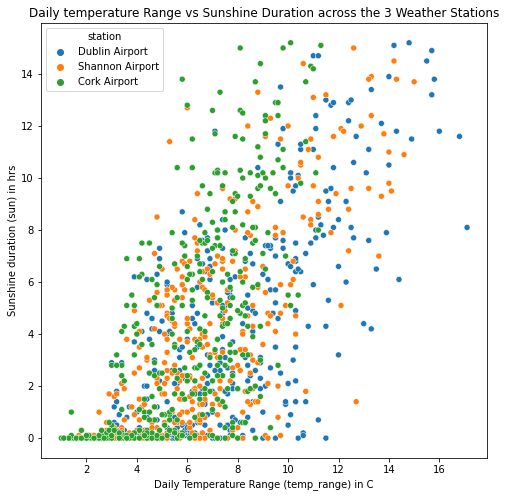

In [47]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
sns.scatterplot(data = weather_data, x = 'temp_range', y = 'sun', hue = 'station')
plt.title('Daily temperature Range vs Sunshine Duration across the 3 Weather Stations')
plt.xlabel('Daily Temperature Range (temp_range) in C')
plt.ylabel('Sunshine duration (sun) in hrs')

### 9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport.

Split the data into 3 new dataframes based on the weather station and used unique() to check if the split happened correctly

In [25]:
dublin_data = weather_data[weather_data['station'] == 'Dublin Airport']
shannon_data = weather_data[weather_data['station'] == 'Shannon Airport']
cork_data = weather_data[weather_data['station'] == 'Cork Airport']

In [26]:
dublin_data['station'].unique()

array(['Dublin Airport'], dtype=object)

In [27]:
shannon_data['station'].unique()

array(['Shannon Airport'], dtype=object)

In [28]:
cork_data['station'].unique()

array(['Cork Airport'], dtype=object)

Used describe() to look at the descriptive statistics of the data. Used seaborn and matplotlib to plot the graphical summary of each of the weather measurements for each airport. used the histogram to show the distribution and skew() to calculate the skewness of each measurement. 

Based on the numerical and graphical summaries, we can make the following observations for each weather measurement -

**Maximum Temperature**

1) The highest maximum temperature in 2021 was recorded at Shannon Airport (29.8 C) <br>
2) Shannon has the highest range of maximum temperature across 2021 compared to Dublin and Cork <br>
3) The average maximum temperature in 2021 was highest at Shannon Airport <br>
4) Shannon and Dublin Airport each have 1 day of missing values for maximum temperature in 2021 <br>
5) The distribution of maximum temperature data for Dublin has a slight negative skew while it's positively skewed for the other 2 airports <br>

**Minimum Temperature**

1) The lowest minimum temperature in 2021 was recorded at Dublin Airport (-5.9 C) <br>
2) Shannon has the highest range of minumum temperature across 2021 compared to Dublin and Cork <br>
3) The average minimum temperature in 2021 was lowest at Shannon Airport <br>
4) Shannon and Dublin Airport each have 1 day of missing values for minimum temperature in 2021 <br>
5) The distribution of minimum temperature data for Cork airport has a slight negative skew while the negative skew is even higher for the other 2 aiports <br>

**Rainfall/Precipitation Amount**

1) The highest rainfall in 2021 was recorded at Cork Airport (50.1 mm) <br>
2) Cork had the highest average rainfall (3.41 mm) while Dublin had the lowest average rainfall (1.82 mm) in 2021 <br>
3) Dublin Airport has 1 day of missing value while Cork airport has 3 days of missing values for rain in 2021 <br>
4) Dublin Airport had the highest number of non-rainy days (0 mm rainfall) in 2021 <br>
5) The distribution of rainfall data for all 3 airports is positively skewed with the skew being highest for Dublin airport<br>

**Mean Wind Speed**

1) The highest mean windspeed in 2021 was recorded at Cork Airport (26.3 knots) <br>
2) Cork Airport had the highest average mean speed (9.32 knots) while Shannon had the lowest average mean speed (7.81 knots) in 2021 <br>
3) Cork Airport has 1 day of missing value for mean wind speed in 2021 <br>
4) The distribution of mean wind speed data for all 3 airports is positively skewed with the skew being highest for Dublin Airport <br>

**Highest Gust**

1) The largest gust speed in 2021 was recorded at Cork Airport (64 knots) <br>
2) Cork Airport had the highest average gust (24.2 knots) while Shannon had the lowest average mean speed (21.8 knots) in 2021<br>
3) Dublin Airport has 1 day of missing value while Shannon Airport has 2 days of missing values for highest gust in 2021 <br>
4) The distribution of highest gust data for all 3 airports is positively skewed with the skew being highest for Shannon airport <br>

**Sunshine Duration**

1) The longest sunshine duration in 2021 was recorded at both Dublin and Cork Airports (15.2 hrs)<br>
2) Cork Airport had the highest average sunshine duration (4.16 hrs) while Shannon had the lowest average sunshine duration (3.85 hrs) in 2021<br>
3) Shannon and Dublin Airport each have 1 day of missing values for sunshine duration in 2021<br>
4) The distribution of sunshine duration data looks similar for all 3 airports with all 3 of them being positively skewed with the skew being highest for Shannon Airport <br>

**Based on all of our observations above, we can conclude that, apart from a few minor differences (in terms of average, range, skewness and a few outliers), the weather measurements are very similar across all 3 weather stations**

In [29]:
dublin_data.describe([0.25,0.5,0.75,0.9,0.99])

,day,year,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,365.000000,365.0,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000,364.000000
mean,15.720548,2021.0,13.590934,6.001099,1.828846,8.625753,22.623626,4.089835,7.589835
std,8.808321,0.0,5.258806,4.748774,3.878082,3.456376,7.790196,3.981802,3.199411
min,1.000000,2021.0,1.500000,-5.900000,0.000000,2.600000,10.000000,0.000000,1.400000
25%,8.000000,2021.0,10.000000,2.000000,0.000000,6.100000,17.000000,0.500000,5.200000
50%,16.000000,2021.0,13.300000,6.200000,0.100000,7.900000,21.000000,2.900000,7.350000
75%,23.000000,2021.0,18.100000,9.900000,1.325000,10.500000,27.250000,6.800000,9.800000
90%,28.000000,2021.0,20.070000,12.300000,6.300000,13.200000,33.000000,10.200000,11.800000
99%,31.000000,2021.0,24.574000,14.700000,20.211000,19.524000,44.110000,14.700000,15.737000
max,31.000000,2021.0,26.800000,15.800000,26.900000,24.400000,50.000000,15.200000,17.100000


In [30]:
shannon_data.describe([0.25,0.5,0.75,0.9,0.99])

,day,year,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,365.000000,365.0,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,15.720548,2021.0,14.368681,7.611813,2.549041,7.815342,21.796143,3.856044,6.756868
std,8.808321,0.0,5.175728,4.820239,4.007511,3.575878,8.372032,3.817264,2.834320
min,1.000000,2021.0,0.600000,-4.600000,0.000000,1.900000,8.000000,0.000000,1.700000
25%,8.000000,2021.0,11.100000,4.275000,0.000000,5.400000,16.000000,0.400000,4.800000
50%,16.000000,2021.0,14.100000,7.650000,0.500000,6.900000,20.000000,2.700000,6.300000
75%,23.000000,2021.0,18.000000,11.525000,3.400000,9.700000,26.000000,6.200000,8.425000
90%,28.000000,2021.0,20.370000,13.900000,8.180000,12.560000,33.000000,9.600000,10.870000
99%,31.000000,2021.0,28.511000,16.274000,18.144000,17.680000,49.000000,13.837000,14.137000
max,31.000000,2021.0,29.600000,18.700000,20.700000,25.800000,61.000000,15.000000,15.000000


In [31]:
cork_data.describe([0.25,0.5,0.75,0.9,0.99])

,day,year,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,365.000000,365.0,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000,365.000000
mean,15.720548,2021.0,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110,6.003288
std,8.808321,0.0,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572,2.342826
min,1.000000,2021.0,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000,1.000000
25%,8.000000,2021.0,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000,4.300000
50%,16.000000,2021.0,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000,6.200000
75%,23.000000,2021.0,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000,7.800000
90%,28.000000,2021.0,19.460000,12.700000,11.150000,14.770000,37.000000,10.200000,8.900000
99%,31.000000,2021.0,24.608000,16.008000,26.709000,21.148000,48.000000,14.616000,10.936000
max,31.000000,2021.0,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000,11.300000


In [ ]:
# ALTERNATE WAY OF DOING IT WITHOUT SPLITTING THE DATA. BUT FORMATTING WILL BE WEIRD. HENCE NOT USING THIS

# stations = [i for i in weather_data['station'].unique()]

# for station in stations:
#     print(station)
#     print()
#     print(weather_data[['maxtp', 'mintp', 'rain', 'wdsp', 'hg', 'sun']][weather_data['station'] == station].describe())
#     print()

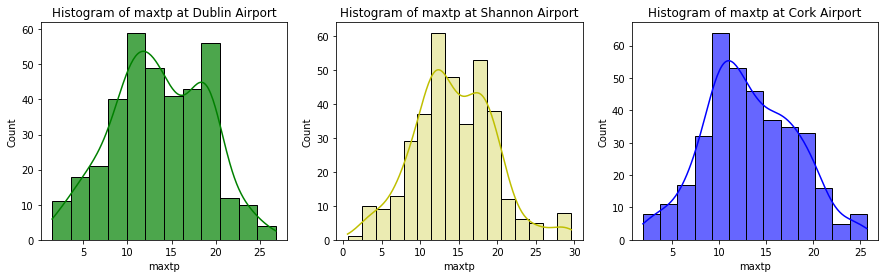

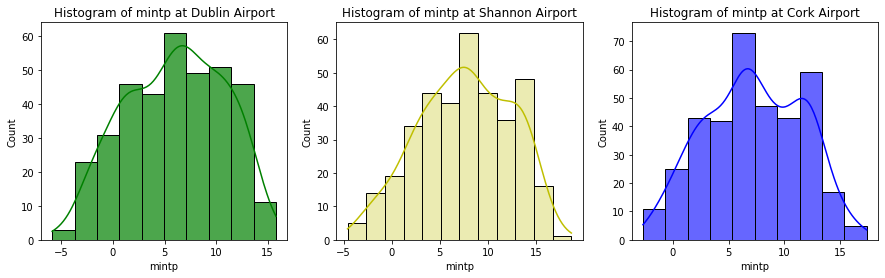

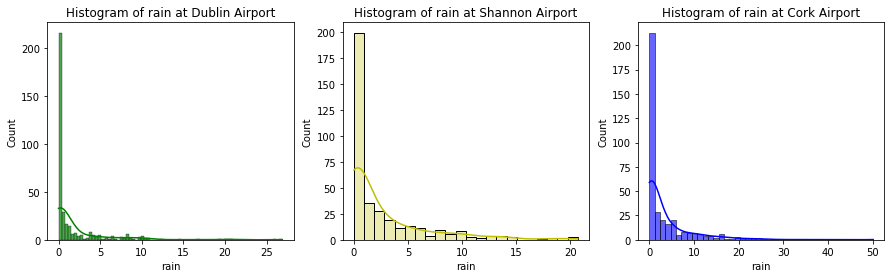

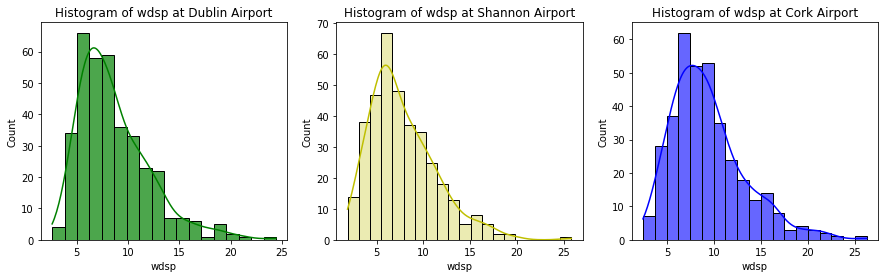

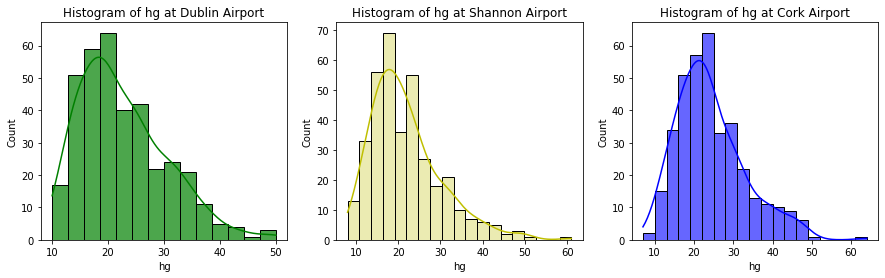

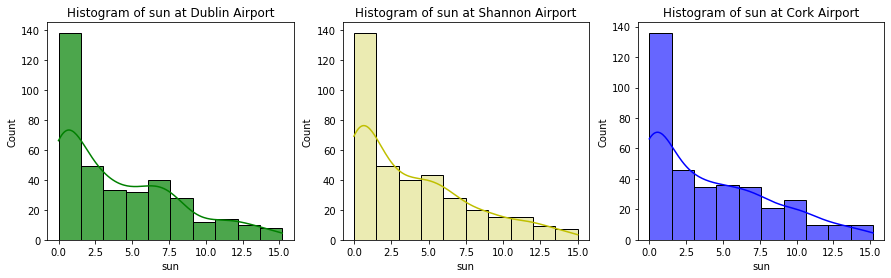

In [32]:
cols = ['maxtp', 'mintp', 'rain', 'wdsp', 'hg', 'sun']

for col in cols:
    fig, ax = plt.subplots(1, 3, figsize = (15,4))
    sns.histplot(data = dublin_data, x = col, ax = ax[0], alpha = 0.7, color = 'g', kde = True)
    ax[0].set_title(f"Histogram of {col} at Dublin Airport")
    sns.histplot(data = shannon_data, x = col, ax = ax[1], alpha = 0.3, color = 'y', kde = True)
    ax[1].set_title(f"Histogram of {col} at Shannon Airport")
    sns.histplot(data = cork_data, x = col, ax = ax[2], alpha = 0.6, color = 'b', kde = True)
    ax[2].set_title(f"Histogram of {col} at Cork Airport")
    

In [33]:
dublin_data[['maxtp','mintp', 'rain', 'wdsp', 'hg', 'sun']].skew(axis = 0)

maxtp   -0.037223
mintp   -0.154167
rain     3.357300
wdsp     1.261484
hg       0.834627
sun      0.876681
dtype: float64

In [34]:
shannon_data[['maxtp','mintp', 'rain', 'wdsp', 'hg', 'sun']].skew(axis = 0)

maxtp    0.205509
mintp   -0.191152
rain     2.134624
wdsp     1.113060
hg       1.193010
sun      0.925035
dtype: float64

In [35]:
cork_data[['maxtp','mintp', 'rain', 'wdsp', 'hg', 'sun']].skew(axis = 0)

maxtp    0.132775
mintp   -0.046993
rain     3.163590
wdsp     1.080312
hg       0.925855
sun      0.794917
dtype: float64